<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/Basic_image_processing_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

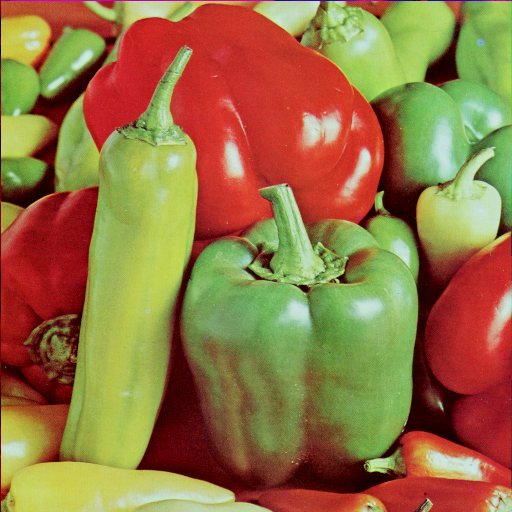

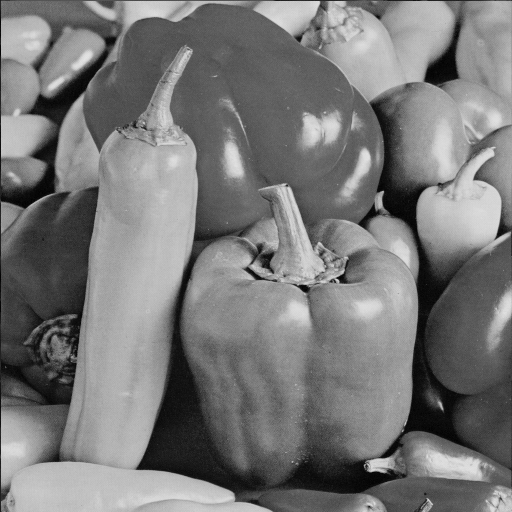

In [6]:
import cv2
from google.colab.patches import cv2_imshow
# 1. Load the image
img = cv2.imread('peppers.png')

# Check if the image was successfully loaded
if img is None:
    print("Error")
else:
    # 2. Display the original image in a window
    cv2_imshow(img)
    cv2.waitKey(0)  # Wait for a key press

    # 3. Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the grayscale image
    cv2_imshow(gray_img)
    cv2.waitKey(0)  # Wait for a key press

    # 4. Save the grayscale image to a new file
    cv2.imwrite('gray_peppers.jpg', gray_img)


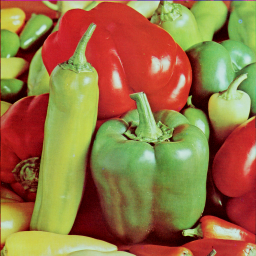

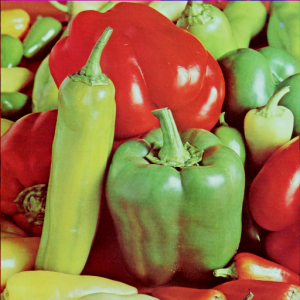

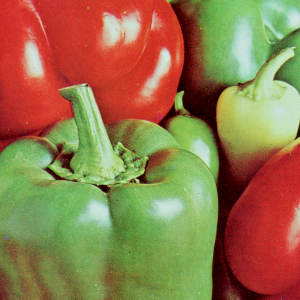

In [8]:

import numpy as np


# 1. Resize the image to half its original size
half_size = (img.shape[1] // 2, img.shape[0] // 2)
resized_half = cv2.resize(img, half_size, interpolation=cv2.INTER_AREA)

# 2. Resize the image to a fixed size of 300x300 pixels
fixed_size = (300, 300)
resized_fixed = cv2.resize(img, fixed_size, interpolation=cv2.INTER_AREA)

# 3. Crop a region (rows 100:400 and columns 200:500)
cropped_img = img[100:400, 200:500]

# Display the results in separate windows
cv2_imshow(resized_half)
print()
cv2_imshow(resized_fixed)
print()
cv2_imshow(cropped_img)



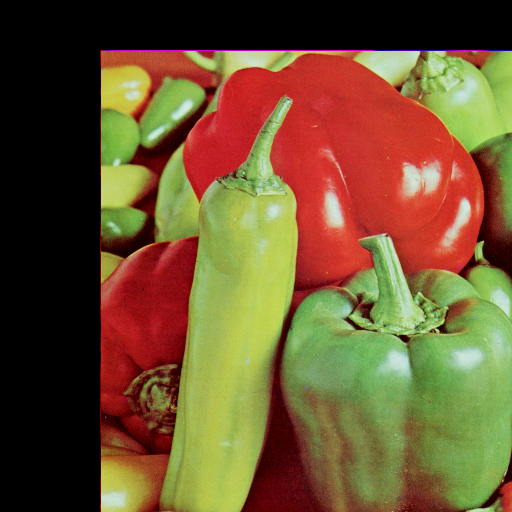

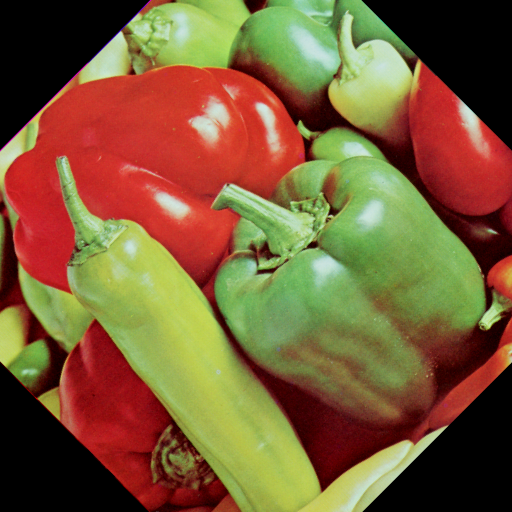

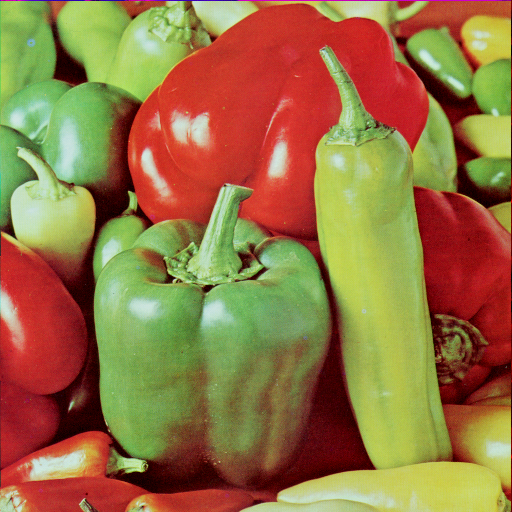

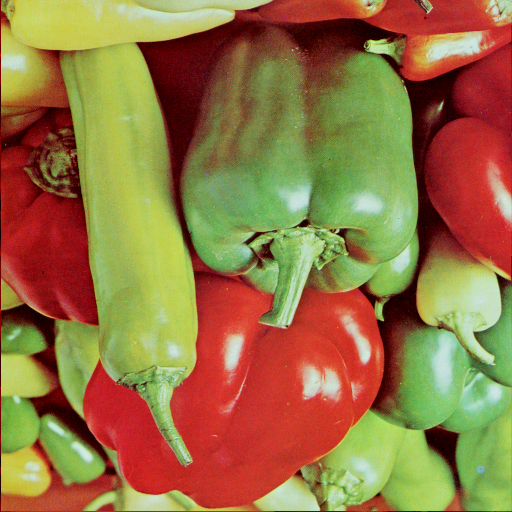

In [10]:

# 1. Translate the image by 100 pixels right and 50 pixels down
M_translate = np.float32([[1, 0, 100], [0, 1, 50]])
translated_img = cv2.warpAffine(img, M_translate, (img.shape[1], img.shape[0]))

# 2. Rotate the image by 45 degrees around its center
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(img, M_rotate, (w, h))

# 3. Flip the image horizontally and vertically
flipped_horizontal = cv2.flip(img, 1)  # 1 indicates horizontal flip
flipped_vertical = cv2.flip(img, 0)    # 0 indicates vertical flip

# Display the transformed images
cv2_imshow(translated_img)
print()
cv2_imshow(rotated_img)
print()
cv2_imshow(flipped_horizontal)
print()
cv2_imshow(flipped_vertical)



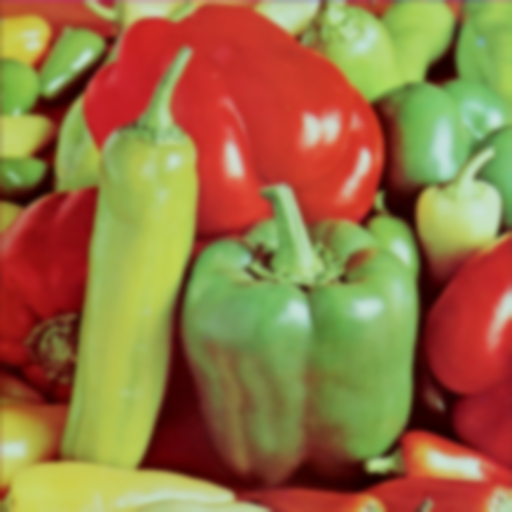

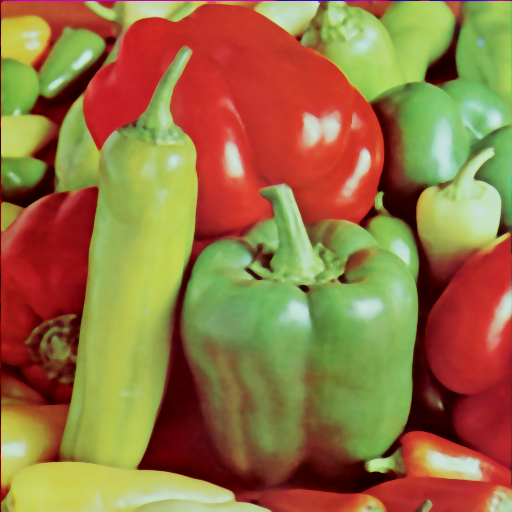

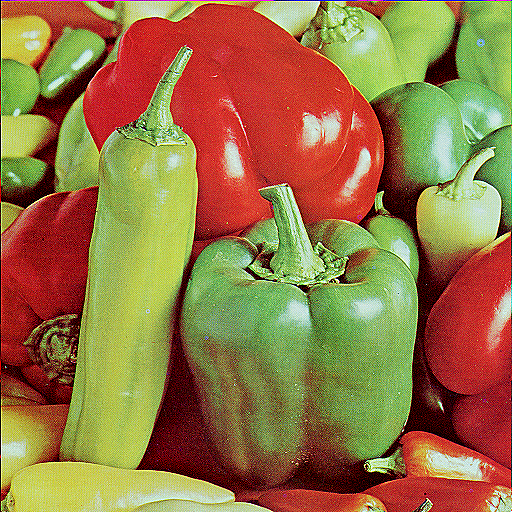

In [12]:

# 1. Apply Gaussian blur
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)

# 2. Apply median blur
median_blur = cv2.medianBlur(img, 5)

# 3. Sharpen the image using a kernel
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)

# Display the filtered images
cv2_imshow(gaussian_blur)
print()
cv2_imshow(median_blur)
print()
cv2_imshow(sharpened_img)


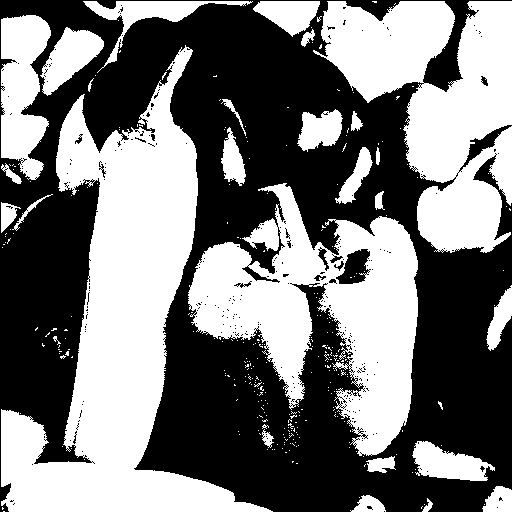

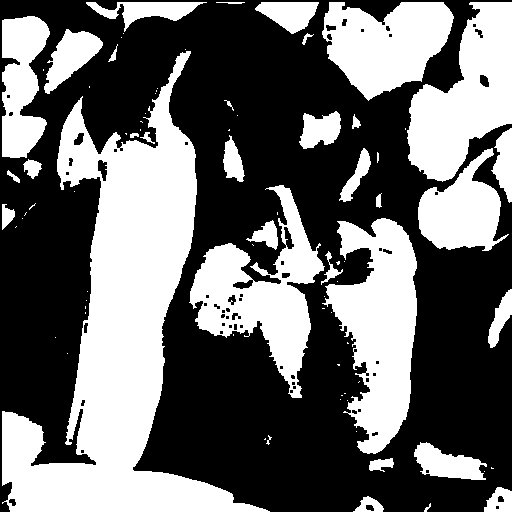

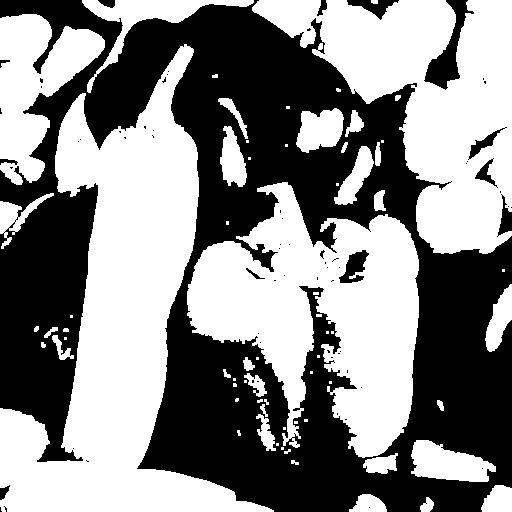

In [15]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('peppers.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if img is None:
    print("Error")
else:
    # 1. Convert the image to binary using thresholding
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # 2. Apply erosion with a 3x3 kernel
    kernel = np.ones((3, 3), np.uint8)
    eroded_img = cv2.erode(binary_img, kernel, iterations=1)

    # 3. Apply dilation with a 3x3 kernel
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

    # Display the results
    cv2_imshow(binary_img)
    print()
    cv2_imshow(eroded_img)
    print()
    cv2_imshow(dilated_img)


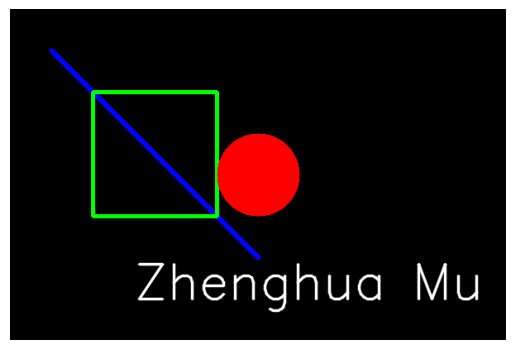

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank (black) image
height, width = 400, 600
image = np.zeros((height, width, 3), dtype=np.uint8)

# Draw a line
cv2.line(image, (50, 50), (300, 300), (255, 0, 0), 5)

# Draw a rectangle
cv2.rectangle(image, (100, 100), (250, 250), (0, 255, 0), 3)

# Draw a circle
cv2.circle(image, (300, 200), 50, (0, 0, 255), -1)

# Write text on the image
cv2.putText(image, 'Zhenghua Mu', (150, 350), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

# Convert the image from BGR to RGB for proper display using Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the final image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


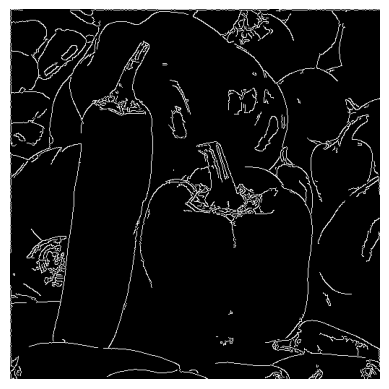

In [19]:
import cv2
import matplotlib.pyplot as plt

# reload the image because it was grayed previously
img = cv2.imread('peppers.png')

# Check if the image was successfully loaded
if img is None:
    print("Error")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_img, 100, 200)

    # Display the edge-detected image using Matplotlib
    plt.imshow(edges, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()
